35363/35363 [==============================] - 0s 1us/step
Predictions: [('n02099712', 'Labrador_retriever', 0.6759585), ('n02099601', 'golden_retriever', 0.1751168), ('n02104029', 'kuvasz', 0.00725143)]
1/1 [==============================] - 0s 67ms/step


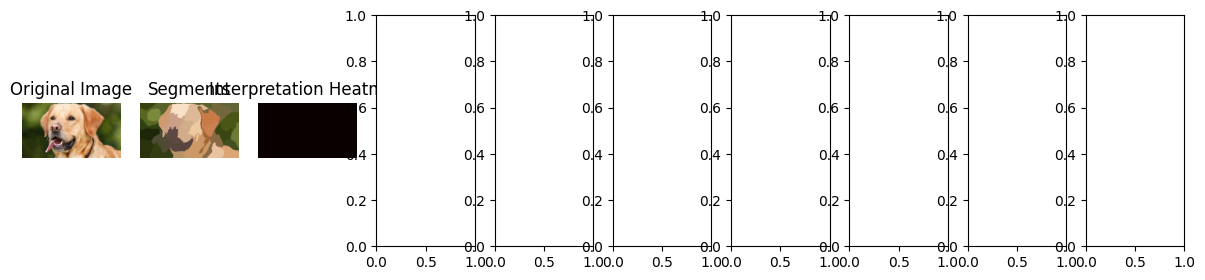

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb

# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to get model predictions
def predict(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=3)[0]

# Custom function for image interpretation similar to LIME
def interpret_image(img_path, model, num_segments=50):
    # Load and preprocess the image
    original_img = image.load_img(img_path)
    img_array = preprocess_image(img_path)

    # Generate predictions
    predictions = predict(model, img_array)
    print("Predictions:", predictions)

    # Convert image to numpy array for segmentation
    img = image.img_to_array(original_img)
    img = np.uint8(img)
    
    # Segment the image using SLIC
    segments = slic(img, n_segments=num_segments, compactness=10, sigma=1)
    
    # Create a mask for each segment and analyze the impact on prediction
    fig, ax = plt.subplots(1, num_segments // 5, figsize=(15, 3))
    heatmap = np.zeros(img.shape[:2])
    
    for i in range(num_segments):
        mask = np.ones(img.shape, dtype=bool)
        mask[segments == i] = False
        masked_img = img * mask

        # Preprocess the masked image
        masked_img_array = preprocess_input(np.expand_dims(masked_img, axis=0))
        
        # Get predictions for the masked image
        masked_preds = model.predict(masked_img_array)
        masked_top_pred = np.argmax(masked_preds[0])
        
        # Increase heatmap value if masked segment affects the top prediction
        if masked_top_pred != np.argmax(predictions[0][2]):
            heatmap[segments == i] += 1

    # Display the original image and the heatmap
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(label2rgb(segments, img, kind='avg'))
    ax[1].set_title('Segments')
    ax[1].axis('off')

    ax[2].imshow(heatmap, cmap='hot')
    ax[2].set_title('Interpretation Heatmap')
    ax[2].axis('off')

    plt.show()

# Path to the image you want to interpret
img_path = 'Image\download.jpeg'

# Interpret the image
interpret_image(img_path, model)


1/1 [==============================] - 2s 2s/step
Predictions: [('n02099712', 'Labrador_retriever', 0.6759585), ('n02099601', 'golden_retriever', 0.1751168), ('n02104029', 'kuvasz', 0.00725143)]
1/1 [==============================] - 0s 82ms/step


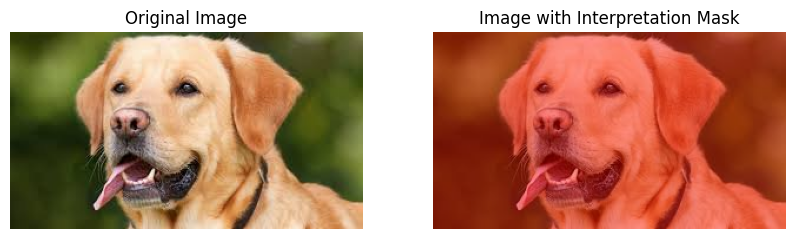

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb

# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to get model predictions
def predict(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=3)[0]

# Custom function for image interpretation similar to LIME
def interpret_image(img_path, model, num_segments=50):
    # Load and preprocess the image
    original_img = image.load_img(img_path)
    img_array = preprocess_image(img_path)

    # Generate predictions
    predictions = predict(model, img_array)
    print("Predictions:", predictions)

    # Convert image to numpy array for segmentation
    img = image.img_to_array(original_img)
    img = np.uint8(img)
    
    # Segment the image using SLIC
    segments = slic(img, n_segments=num_segments, compactness=10, sigma=1)
    
    # Create a mask for each segment and analyze the impact on prediction
    heatmap = np.zeros(img.shape[:2])
    
    for i in range(num_segments):
        mask = np.ones(img.shape, dtype=bool)
        mask[segments == i] = False
        masked_img = img * mask

        # Preprocess the masked image
        masked_img_array = preprocess_input(np.expand_dims(masked_img, axis=0))
        
        # Get predictions for the masked image
        masked_preds = model.predict(masked_img_array)
        masked_top_pred = np.argmax(masked_preds[0])
        
        # Increase heatmap value if masked segment affects the top prediction
        if masked_top_pred != np.argmax(predictions[0][2]):
            heatmap[segments == i] += 1

    # Create interpretation mask
    mask = np.zeros_like(img)
    mask[heatmap > 0] = [255, 0, 0]  # Red mask for important segments
    
    # Overlay the mask on the original image
    alpha = 0.4
    img_with_mask = original_img.copy()
    img_with_mask = np.array(img_with_mask, dtype=np.uint8)
    img_with_mask = alpha * mask + (1 - alpha) * img_with_mask
    img_with_mask = np.clip(img_with_mask, 0, 255).astype(np.uint8)
    
    # Display the original image and the image with mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(img_with_mask)
    ax[1].set_title('Image with Interpretation Mask')
    ax[1].axis('off')

    plt.show()

# Path to the image you want to interpret
img_path = 'Image\download.jpeg'

# Interpret the image
interpret_image(img_path, model)


1/1 [==============================] - 0s 92ms/step


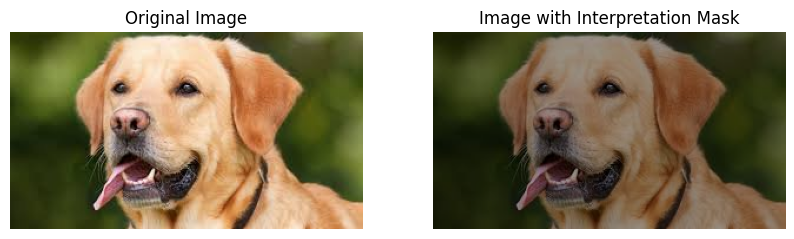

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb

# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to get model predictions
def predict(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=3)[0]

# Custom function for image interpretation similar to LIME
def interpret_image(img_path, model, num_segments=50):
    # Load and preprocess the image
    original_img = image.load_img(img_path)
    img_array = preprocess_image(img_path)

    # Generate baseline predictions
    baseline_preds = model.predict(img_array)
    baseline_top_pred = np.argmax(baseline_preds[0])

    # Convert image to numpy array for segmentation
    img = image.img_to_array(original_img)
    img = np.uint8(img)
    
    # Segment the image using SLIC
    segments = slic(img, n_segments=num_segments, compactness=10, sigma=1)
    
    # Analyze the impact of each segment on the prediction
    importance_scores = np.zeros(num_segments)
    
    for i in range(num_segments):
        mask = np.ones(img.shape, dtype=bool)
        mask[segments == i] = False
        masked_img = img * mask

        # Preprocess the masked image
        masked_img_array = preprocess_input(np.expand_dims(masked_img, axis=0))
        
        # Get predictions for the masked image
        masked_preds = model.predict(masked_img_array)
        masked_top_pred = np.argmax(masked_preds[0])
        
        # Calculate the change in prediction score
        importance_scores[i] = baseline_preds[0][baseline_top_pred] - masked_preds[0][baseline_top_pred]
    
    # Create interpretation mask based on importance scores
    mask = np.zeros_like(img)
    for i in range(num_segments):
        if importance_scores[i] > 0.01:  # Threshold to consider a segment important
            mask[segments == i] = [255, 0, 0]  # Red mask for important segments
    
    # Overlay the mask on the original image
    alpha = 0.4
    img_with_mask = original_img.copy()
    img_with_mask = np.array(img_with_mask, dtype=np.uint8)
    img_with_mask = alpha * mask + (1 - alpha) * img_with_mask
    img_with_mask = np.clip(img_with_mask, 0, 255).astype(np.uint8)
    
    # Display the original image and the image with mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(img_with_mask)
    ax[1].set_title('Image with Interpretation Mask')
    ax[1].axis('off')

    plt.show()

# Path to the image you want to interpret
img_path = 'Image\download.jpeg'

# Interpret the image
interpret_image(img_path, model)


1/1 [==============================] - 0s 88ms/step


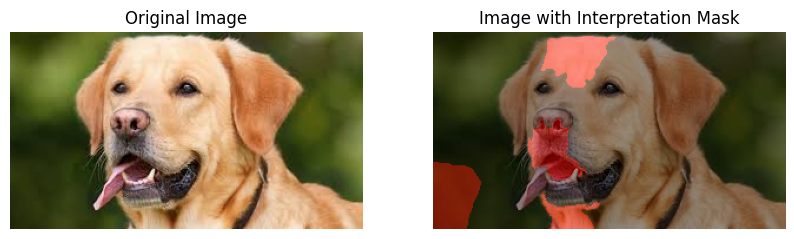

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import slic

# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to get model predictions
def predict(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=1)[0][0]  # Get the top prediction

# Custom function for image interpretation similar to LIME
def interpret_image(img_path, model, num_segments=50):
    # Load and preprocess the image
    original_img = image.load_img(img_path)
    img_array = preprocess_image(img_path)

    # Generate baseline predictions
    baseline_preds = model.predict(img_array)
    baseline_top_pred = np.argmax(baseline_preds[0])

    # Convert image to numpy array for segmentation
    img = image.img_to_array(original_img)
    img = np.uint8(img)
    
    # Segment the image using SLIC
    segments = slic(img, n_segments=num_segments, compactness=10, sigma=1)
    
    # Analyze the impact of each segment on the prediction
    importance_scores = np.zeros(num_segments)
    
    for i in range(num_segments):
        temp_img = img.copy()
        temp_img[segments == i] = 0  # Mask the segment
        
        # Preprocess the masked image
        masked_img_array = preprocess_input(np.expand_dims(temp_img, axis=0))
        
        # Get predictions for the masked image
        masked_preds = model.predict(masked_img_array)
        masked_top_pred = masked_preds[0][baseline_top_pred]
        
        # Calculate the drop in probability for the top prediction
        importance_scores[i] = baseline_preds[0][baseline_top_pred] - masked_top_pred
    
    # Create interpretation mask based on importance scores
    mask = np.zeros(img.shape, dtype=np.uint8)
    threshold = np.mean(importance_scores)  # Set threshold as mean importance score
    for i in range(num_segments):
        if importance_scores[i] > threshold:
            mask[segments == i] = [255, 0, 0]  # Red mask for important segments
    
    # Overlay the mask on the original image
    alpha = 0.4
    img_with_mask = original_img.copy()
    img_with_mask = np.array(img_with_mask, dtype=np.uint8)
    img_with_mask = alpha * mask + (1 - alpha) * img_with_mask
    img_with_mask = np.clip(img_with_mask, 0, 255).astype(np.uint8)
    
    # Display the original image and the image with mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(img_with_mask)
    ax[1].set_title('Image with Interpretation Mask')
    ax[1].axis('off')

    plt.show()

# Path to the image you want to interpret
img_path = 'Image\download.jpeg'

# Interpret the image
interpret_image(img_path, model)


1/1 [==============================] - 0s 83ms/step


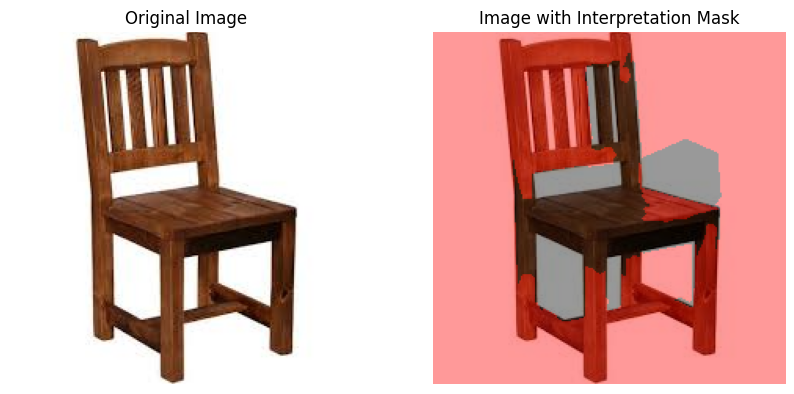

In [19]:
img_path = 'Image\Chair.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 128ms/step


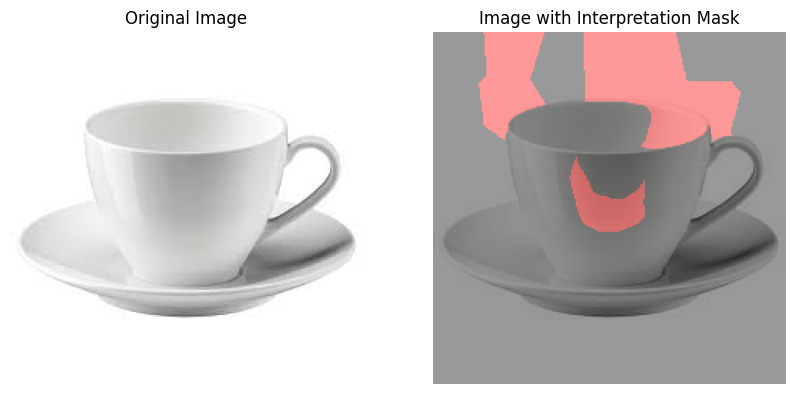

In [20]:
img_path = 'Image\cup.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 79ms/step


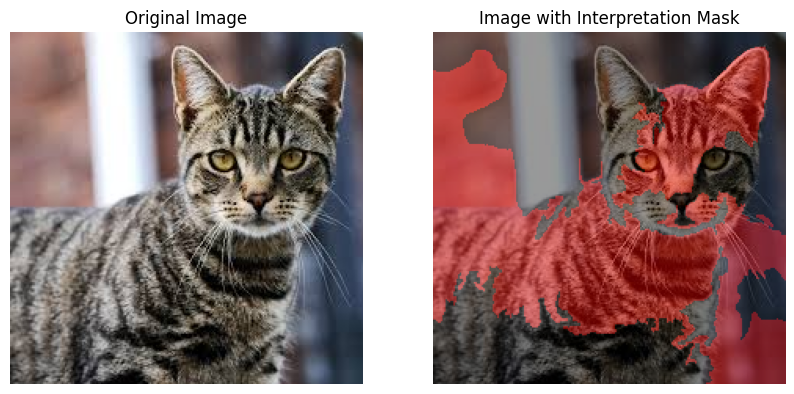

In [21]:
img_path = 'Image\cat.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 150ms/step


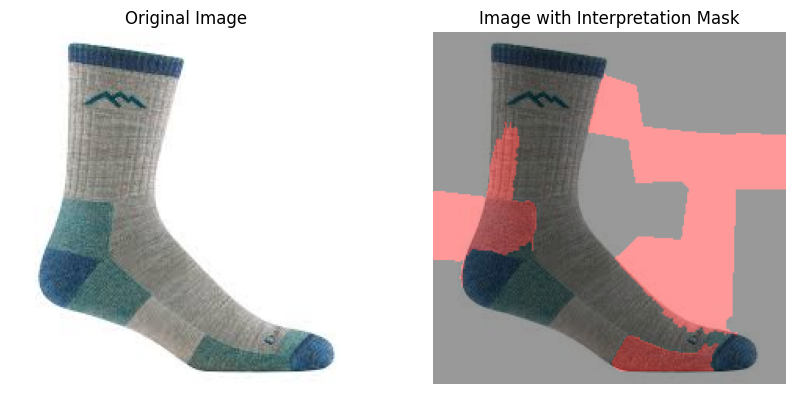

In [22]:
img_path = 'Image\sock.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 281ms/step


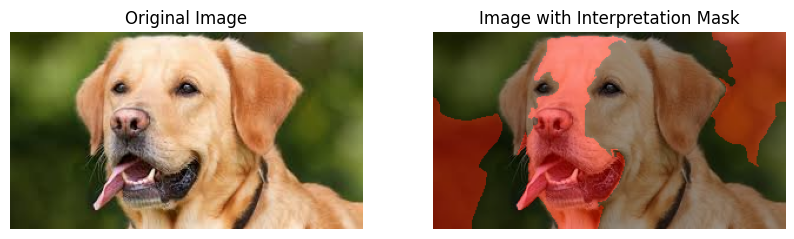

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import slic

# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to get model predictions
def predict(model, img_array):
    preds = model.predict(img_array)
    return decode_predictions(preds, top=1)[0][0]  # Get the top prediction

# Custom function for image interpretation similar to LIME
def interpret_image(img_path, model, num_segments=35):
    # Load and preprocess the image
    original_img = image.load_img(img_path)
    img_array = preprocess_image(img_path)

    # Generate baseline predictions
    baseline_preds = model.predict(img_array)
    baseline_top_pred = np.argmax(baseline_preds[0])
    baseline_top_pred_prob = baseline_preds[0][baseline_top_pred]

    # Convert image to numpy array for segmentation
    img = image.img_to_array(original_img)
    img = np.uint8(img)
    
    # Segment the image using SLIC
    segments = slic(img, n_segments=num_segments, compactness=10, sigma=1)
    
    # Analyze the impact of each segment on the prediction
    segment_importance = np.zeros(num_segments)
    
    for i in range(num_segments):
        temp_img = img.copy()
        temp_img[segments == i] = 0  # Mask the segment
        perturbed_img_array = preprocess_input(np.expand_dims(temp_img, axis=0))
        
        # Get predictions for the perturbed image
        perturbed_preds = model.predict(perturbed_img_array)
        perturbed_top_pred_prob = perturbed_preds[0][baseline_top_pred]
        
        # Calculate the drop in probability for the top prediction
        segment_importance[i] = baseline_top_pred_prob - perturbed_top_pred_prob
    
    # Create interpretation mask based on importance scores
    mask = np.zeros(img.shape, dtype=np.uint8)
    threshold = np.mean(segment_importance)  # Adjust threshold if needed
    for i in range(num_segments):
        if segment_importance[i] > threshold:
            mask[segments == i] = [255, 0, 0]  # Red mask for important segments
    
    # Overlay the mask on the original image
    alpha = 0.4
    img_with_mask = np.array(original_img, dtype=np.uint8)
    img_with_mask = alpha * mask + (1 - alpha) * img_with_mask
    img_with_mask = np.clip(img_with_mask, 0, 255).astype(np.uint8)
    
    # Display the original image and the image with mask
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(img_with_mask)
    ax[1].set_title('Image with Interpretation Mask')
    ax[1].axis('off')

    plt.show()

# Path to the image you want to interpret
img_path = 'Image\download.jpeg'

# Interpret the image
interpret_image(img_path, model)


1/1 [==============================] - 0s 267ms/step


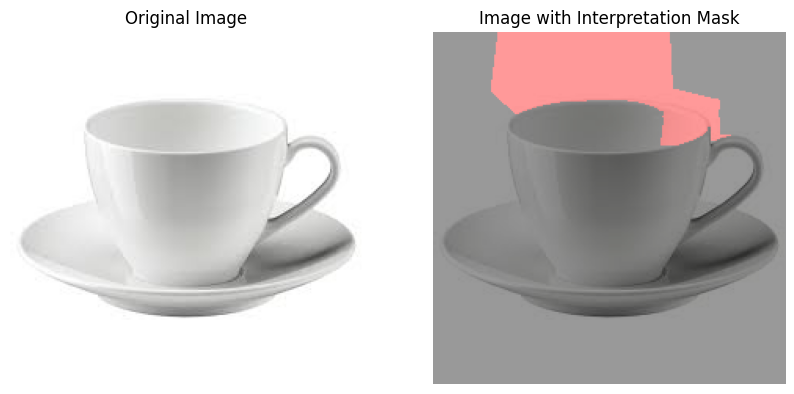

In [36]:
img_path = 'Image\cup.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 269ms/step


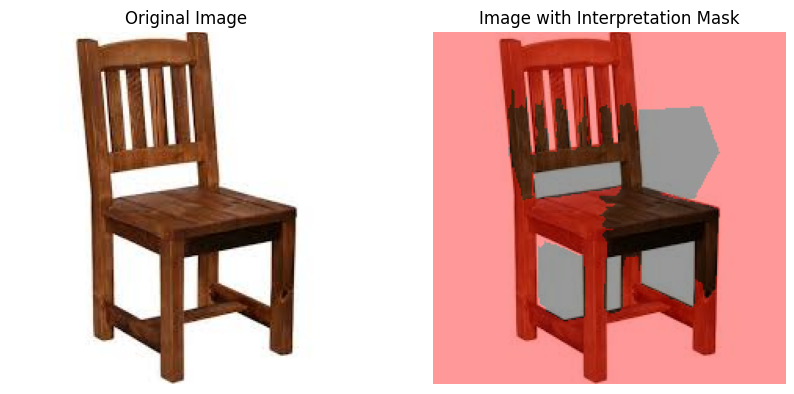

In [37]:
img_path = 'Image\chair.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 310ms/step


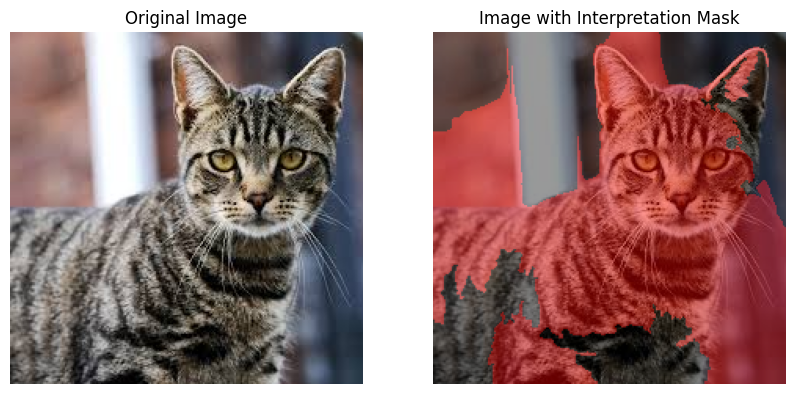

In [38]:
img_path = 'Image\cat.jpeg'

# Interpret the image
interpret_image(img_path, model)

1/1 [==============================] - 0s 324ms/step


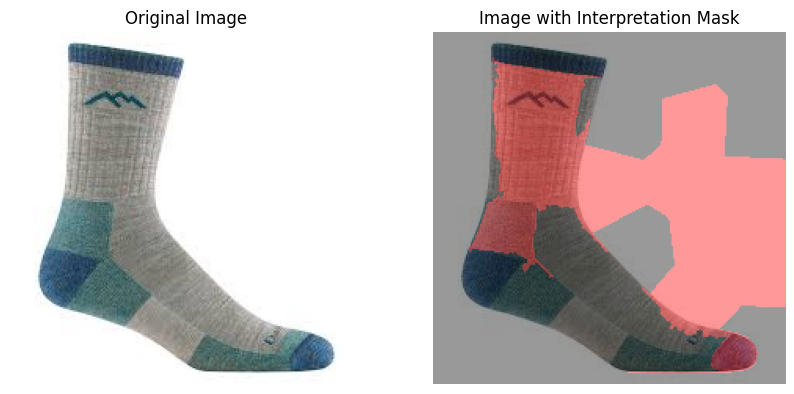

In [39]:
img_path = 'Image\sock.jpeg'

# Interpret the image
interpret_image(img_path, model)